In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

Lightly damped PT2 parameters

In [2]:
wn = 5          # natural frequency
zeta = 0.05     # very light damping

Transfer function

In [3]:
num = [wn**2]
den = [1, 2*zeta*wn, wn**2]

G = ct.TransferFunction(num, den)

Time vector for step response

In [4]:
t = np.linspace(0, 5, 1000)

Step response

In [5]:
t_step, y_step = ct.step_response(G, t)

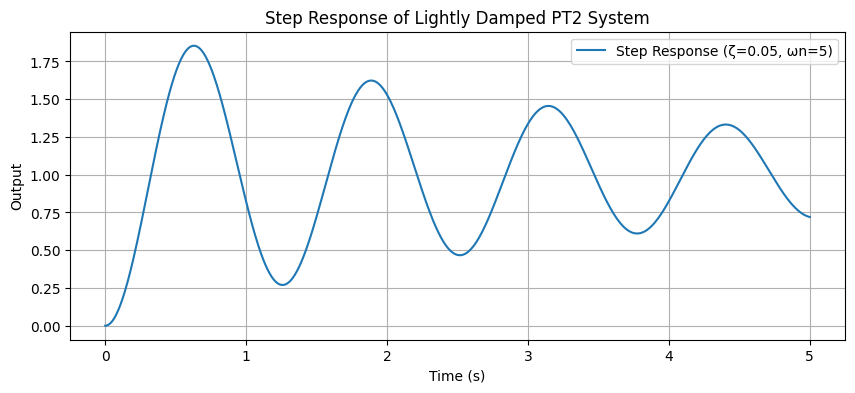

In [6]:
plt.figure(figsize=(10,4))
plt.plot(t_step, y_step, label=f'Step Response (ζ={zeta}, ωn={wn})')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step Response of Lightly Damped PT2 System')
plt.grid(True)
plt.legend()
plt.show()

Frequency vector for Bode plot

In [7]:
omega = np.logspace(-1, 2, 1000)  # 0.1 to 100 rad/s

Frequency response

In [8]:
mag, phase, omega = ct.frequency_response(G, omega)

Convert magnitude to dB and phase to degrees

In [9]:
mag_db = 20*np.log10(abs(mag.squeeze()))
phase_deg = np.unwrap(phase.squeeze()) * 180/np.pi

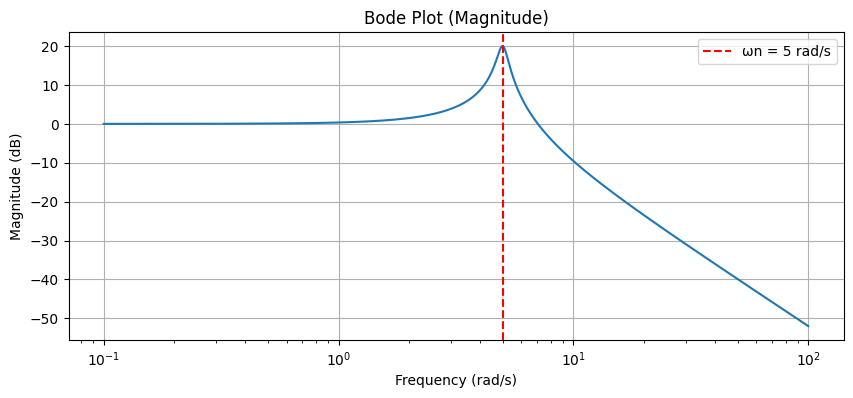

In [10]:
plt.figure(figsize=(10,4))

# Magnitude
plt.semilogx(omega, mag_db)
plt.axvline(wn, color='r', linestyle='--', label=f'ωn = {wn} rad/s')
plt.title('Bode Plot (Magnitude)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()

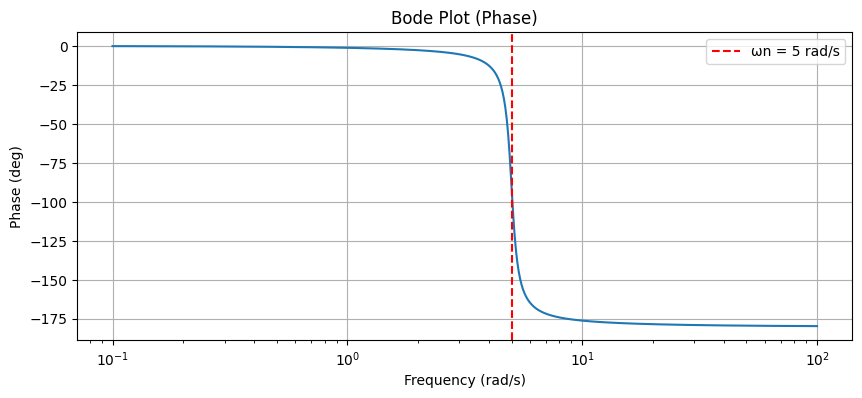

In [11]:
plt.figure(figsize=(10,4))

# Phase
plt.semilogx(omega, phase_deg)
plt.axvline(wn, color='r', linestyle='--', label=f'ωn = {wn} rad/s')
plt.title('Bode Plot (Phase)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (deg)')
plt.grid(True)
plt.legend()